In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from curriculum_learning.models.classifier_model import ClassifierModel
from curriculum_learning.utils import losses_ordering
import yaml

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dct = pickle.load(fo, encoding='bytes')
    return dct

In [5]:
with open("models_hyperparameters.yaml", "r") as stream:
    res = yaml.safe_load(stream)

In [6]:
data = unpickle("../data/cifar-10-batches-py/data_batch_1")
data2 = data[b"data"].reshape(10000, 3, 32, 32).transpose(0, 3, 2, 1).astype("float32")
y = np.array(data[b"labels"])
output_shape2 = 10

In [7]:
test_model_1 = res["test_model_1"]
model = ClassifierModel(output_shape=output_shape2, **test_model_1)

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [9]:
model.fit(data2, y, epochs=30)

Epoch 1/30
313/313 [==============================] - 3s 7ms/step - loss: 2.2172 - accuracy: 0.2080
Epoch 2/30
216/313 [===================>..........] - ETA: 0s - loss: 1.9081 - accuracy: 0.2975

KeyboardInterrupt: 

In [ ]:
pred = model.predict(data2)

In [ ]:
result = losses_ordering.order_data_by_losses(data2, tf.keras.losses.SparseCategoricalCrossentropy(), y, pred)

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 0,  0,  0],
        [ 3,  3,  3],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 3,  3,  3],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       ...,

       [[46, 42, 22],
        [60, 55, 28],
        [52, 45, 21],
        ...,
        [ 3,  4,  3],
        [ 1,  4,  4],
        [ 1,  6,  6]],

       [[48, 45, 33],
        [57, 53, 38],
        [29, 23, 11],
        ...,
        [ 1,  2,  2],
        [ 0,  2,  3],
        [ 0,  2,  3]],

       [[27, 25, 16],
        [24, 20, 14],
        [31, 25, 22],
        ...,
        [ 2,  2,  2],
        [ 2,  3,  4],
        [ 1,  1,  3]]], dtype=int8)

In [24]:
result[0].astype("int16").max()

255

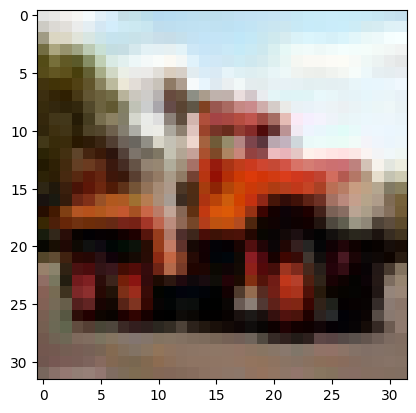

In [54]:
plt.imshow(np.rot90(result[59].astype("int16"), k=3))